# Изучение NetCDF4

- начал с курса: https://www.youtube.com/watch?v=699jkjLJGyM&list=PLpykv05eUR0rAuaLnybkZORnCwyND4CV4

In [14]:
import netCDF4 as nc
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
#netcdf_file = "/home/voland/Documents/NetCdf4/daymet_v4_vp_monavg_na_2023.nc"
netcdf_file = 'https://opendap1.nodc.no/opendap/physics/point/cruise/nansen_legacy-single_profile/NMDC_Nansen-Legacy_PR_CT_58US_2021708/CTD_station_P1_NLEG01-1_-_Nansen_Legacy_Cruise_-_2021_Joint_Cruise_2-1.nc'

xrds = xr.open_dataset(netcdf_file)

### Эксперементы с ключами .nc

In [7]:
xrds.attrs['Conventions']

'CF-1.8, ACDD-1.3, OceanSITES Manual 1.4'

In [10]:
xrds.dims

FrozenMappingWarningOnValuesAccess({'PRES': 320})

In [21]:
temperature = xrds.data_vars['TEMP'].values
temperature

array([3.735, 3.738, 3.739, 3.741, 3.736, 3.737, 3.736, 3.742, 3.736,
       3.738, 3.783, 3.833, 3.838, 3.837, 3.83 , 3.806, 3.792, 3.79 ,
       3.814, 3.846, 3.858, 3.833, 3.815, 3.817, 3.814, 3.812, 3.792,
       3.709, 3.704, 3.642, 3.582, 3.546, 3.512, 3.484, 3.368, 3.297,
       3.165, 3.106, 3.094, 3.094, 3.102, 3.079, 3.094, 3.076, 3.035,
       3.009, 2.992, 2.981, 2.954, 2.933, 2.903, 2.874, 2.85 , 2.824,
       2.801, 2.787, 2.764, 2.713, 2.711, 2.705, 2.701, 2.696, 2.682,
       2.665, 2.651, 2.647, 2.642, 2.635, 2.624, 2.588, 2.604, 2.608,
       2.593, 2.507, 2.472, 2.468, 2.46 , 2.453, 2.441, 2.43 , 2.431,
       2.43 , 2.431, 2.433, 2.43 , 2.417, 2.394, 2.382, 2.361, 2.335,
       2.32 , 2.303, 2.275, 2.267, 2.263, 2.277, 2.27 , 2.265, 2.262,
       2.256, 2.241, 2.216, 2.201, 2.191, 2.176, 2.135, 2.11 , 2.091,
       2.071, 2.064, 2.103, 2.106, 2.099, 2.095, 2.092, 2.088, 2.082,
       2.085, 2.093, 2.09 , 2.089, 2.085, 2.054, 2.022, 2.019, 2.021,
       2.026, 2.027,

In [25]:
temp_var_attrs = xrds.data_vars['TEMP'].attrs['standard_name']
temp_var_attrs

'sea_water_temperature'

### Строю графики из NetCDF 

In [4]:
url = 'https://opendap1.nodc.no/opendap/chemistry/point/cruise/nansen_legacy/2021708/Chlorophyll_A_and_phaeopigments_Nansen_Legacy_cruise_2021708_station_P4_NLEG11_20210718T085042.nc'
xrds = xr.open_dataset(url)
xrds

<xarray.Dataset> Size: 2kB
Dimensions:              (DEPTH: 11)
Coordinates:
  * DEPTH                (DEPTH) float32 44B 323.0 200.3 120.1 ... 10.09 5.163
Data variables:
    CHLOROPHYLL_A_TOTAL  (DEPTH) float64 88B ...
    PHAEOPIGMENTS_TOTAL  (DEPTH) float64 88B ...
    FILTERED_VOL_TOTAL   (DEPTH) float64 88B ...
    EVENTID_TOTAL        (DEPTH) |S64 704B ...
    CHLOROPHYLL_A_10um   (DEPTH) float64 88B ...
    PHAEOPIGMENTS_10um   (DEPTH) float64 88B ...
    FILTERED_VOL_10um    (DEPTH) float64 88B ...
    EVENTID_10um         (DEPTH) |S64 704B ...
Attributes: (12/37)
    id:                                 71433e5e-e81a-5b24-a529-6be0f5f18069
    naming_authority:                   The University Centre in Svalbard, No...
    title:                              Chlorophyll A and phaeopigments Nanse...
    summary:                            'This dataset is a collection of the ...
    keywords:                           Oceans > Ocean chemistry > Chlorophyll
    keywords_vocabulary:                GCMD Science Keywords
    ...                                 ...
    samplingProtocol:                   Nansen Legacy sampling protocols vers...
    pi_name:                            Anna Vader
    pi_institution:                     University Centre in Svalbard
    pi_email:                           annav@unis.no
    sea_floor_depth_below_sea_surface:  332.58
    _NCProperties:                      version=2,netcdf=4.6.3,hdf5=1.10.5

array([0.01565072, 0.01550788, 0.01912119, 0.02236113,        nan,
       0.07194841, 0.28370929, 1.12279562, 6.07793473, 2.99329871,
       1.90354194])

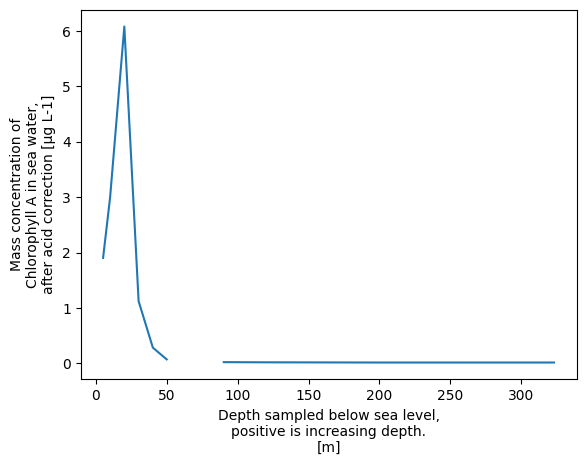

In [43]:
xrds['CHLOROPHYLL_A_TOTAL'].plot()
xrds['CHLOROPHYLL_A_TOTAL'].values

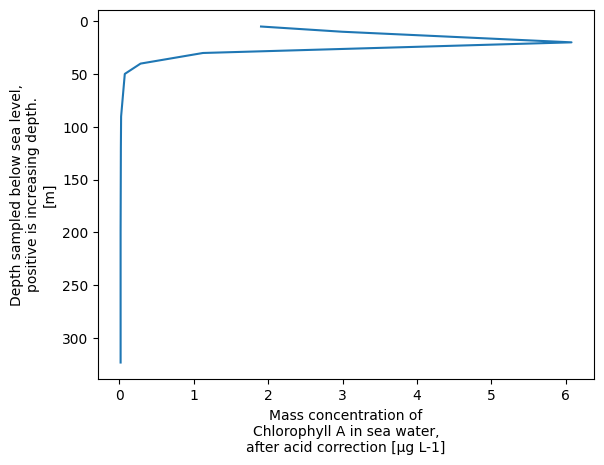

In [44]:
xr.plot.line(xrds['CHLOROPHYLL_A_TOTAL'].dropna('DEPTH'), y = 'DEPTH', yincrease=False)

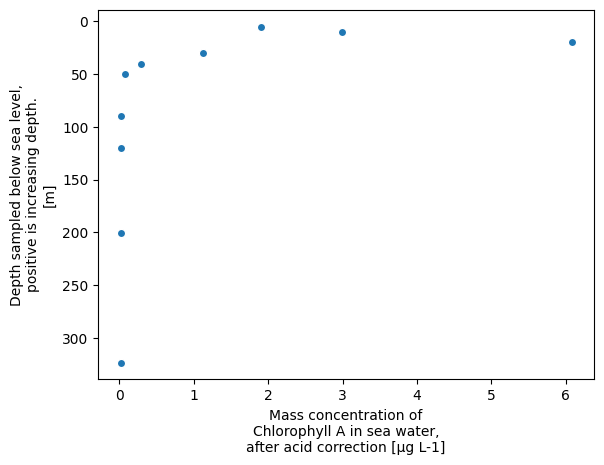

In [47]:
xrds.plot.scatter(
    x='CHLOROPHYLL_A_TOTAL',
    y='DEPTH',
    yincrease=False,
)

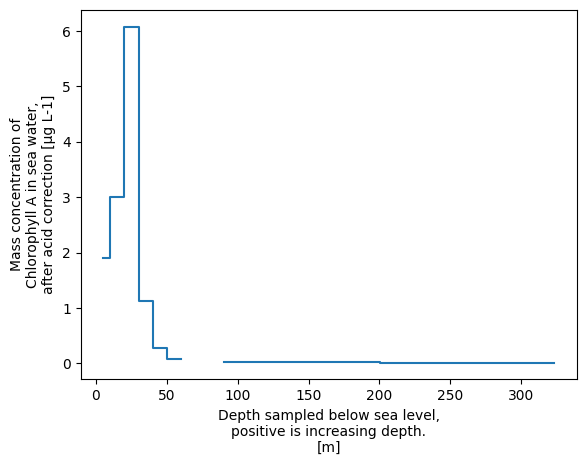

In [49]:
xrds['CHLOROPHYLL_A_TOTAL'].plot.step()

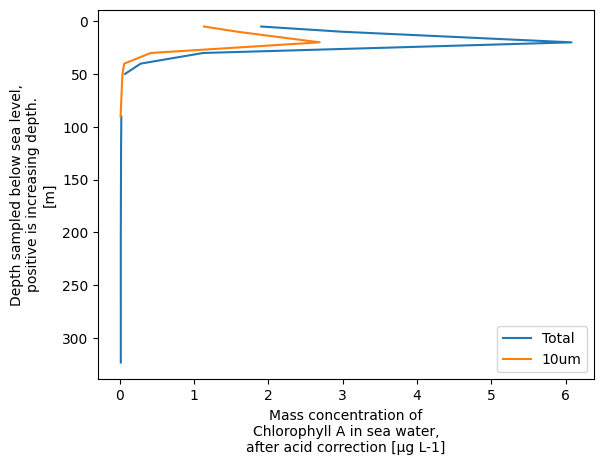

In [53]:
xrds['CHLOROPHYLL_A_TOTAL'].plot.line(y='DEPTH', yincrease=False, label='Total')
xrds['CHLOROPHYLL_A_10um'].plot.line(y='DEPTH', yincrease=False, label='10um')
plt.legend()

In [8]:
url = 'https://www.ncei.noaa.gov/thredds/dodsC/noaa-global-temp-v5/NOAAGlobalTemp_v5.0.0_gridded_s188001_e202212_c20230108T133308.nc'
xrds = xr.open_dataset(url)

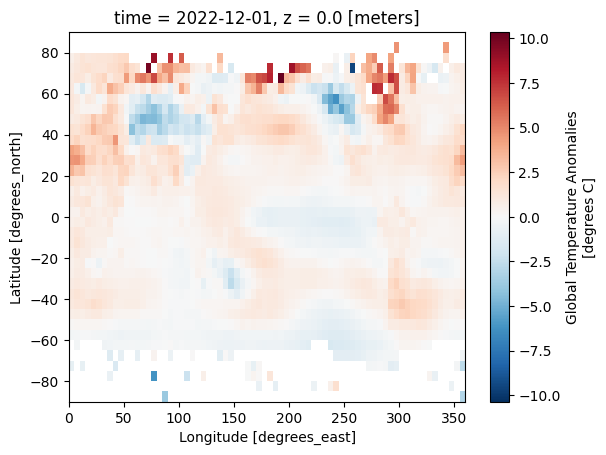

In [11]:
desired_date = '2022-12-01'
data_for_desired_date = xrds.sel(time=desired_date)
data_for_desired_date['anom'].plot()

Text(0.5, 1.0, 'Global Surface Temperature Anomalies for 2001-06-01')

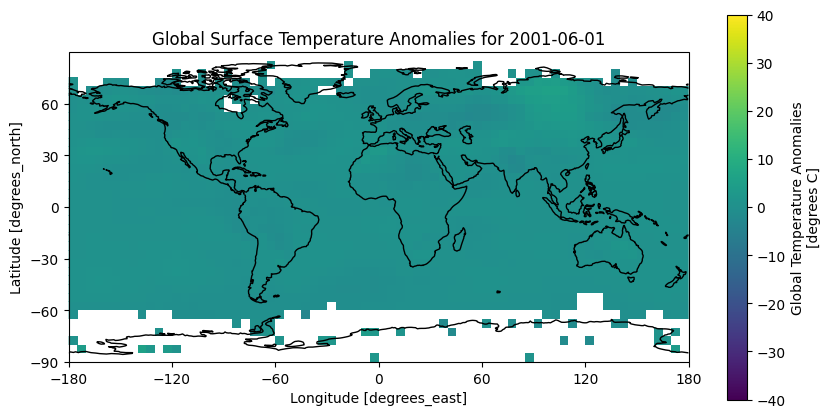

In [27]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())

desired_date = '2001-06-01'
data_for_desired_date = xrds.sel(time=desired_date)

vmin = xrds['anom'].attrs['valid_min']
vmax = xrds['anom'].attrs['valid_max']
vmin_abs = abs(vmin)
abs_max = max(vmin_abs, vmax)

ax.coastlines() # добавление береговой линии
ax.set_xticks(range(-180, 181, 60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-90, 90, 30), crs=ccrs.PlateCarree())

ax.set_xlabel('longitude')
ax.set_ylabel('latitude')


data_for_desired_date['anom'].plot(vmin=-abs_max, vmax=abs_max)

plt.title(f'Global Surface Temperature Anomalies for {desired_date}')

### NetCDF to dataframe